In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/content/Brain Stroke.csv")


In [18]:
print(dataset.shape)
print("")
print(dataset.info())
print("")
print(dataset.describe())
print("")
dataset.head(5)

(4981, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
dataset["gender"] = lbl.fit_transform(dataset["gender"])
dataset["ever_married"] = lbl.fit_transform(dataset["ever_married"])
dataset["work_type"] = lbl.fit_transform(dataset["work_type"])
dataset["Residence_type"] = lbl.fit_transform(dataset["Residence_type"])
dataset["smoking_status"] = lbl.fit_transform(dataset["smoking_status"])


In [20]:
print(dataset.shape)
dataset.head(5)

(4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


Counter({0: 4733, 1: 248})


<Axes: >

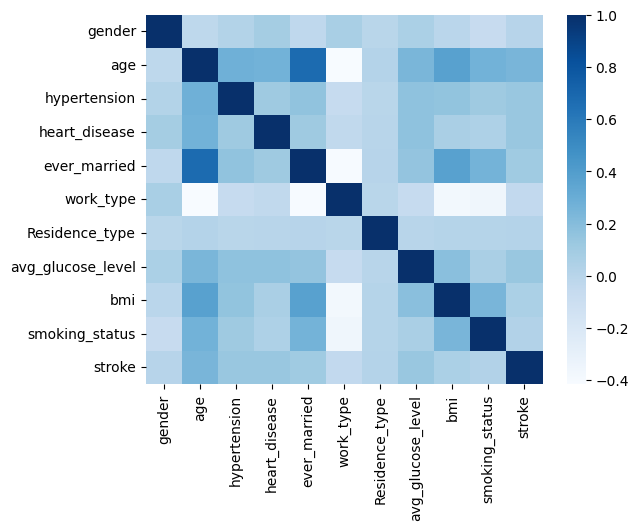

In [21]:
from collections import Counter
print(Counter(dataset["stroke"]))
sns.heatmap(data = dataset.corr(),cmap = "Blues")

In [22]:
dataset.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


#Logistic Regression Algorithm


In [23]:
x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]

print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("")

print(accuracy_score(y_test,y_pred)*100)
print("")

print(confusion_matrix(y_test,y_pred))
print("")


(4981, 10)
(4981,)

94.71571906354515

[[1415    2]
 [  77    1]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression with Normalization Techqnique



In [24]:

x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("")

print(accuracy_score(y_test,y_pred)*100)
print("")

print(confusion_matrix(y_test,y_pred))
print("")


94.78260869565217

[[1417    0]
 [  78    0]]



# Logistic Regression with Standard Scaler Techqnique

In [25]:
x =  dataset.iloc[ : , :-1]
y = dataset.iloc[ : ,-1]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 77)
scaler = StandardScaler()
model = LogisticRegression()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("")

print(accuracy_score(y_pred,y_test)*100)
print("")

print(confusion_matrix(y_pred,y_test))
print("")

print(x_train.shape)
print(y_pred.shape)
print("rows = ",x_train.shape + y_pred.shape)
print("")







94.78435305917753

[[944  52]
 [  0   1]]

(3984, 10)
(997,)
rows =  (3984, 10, 997)



#KNN Algorithm

In [26]:
x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : ,-1]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=70)
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print("")

print(accuracy_score(y_pred,y_test)*100)
print("")

print(confusion_matrix(y_pred,y_test))
print("")




95.6661316211878

[[1192   50]
 [   4    0]]



#KNN Algorithm with Standardization

In [27]:
x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : ,-1]

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 70)
knn = KNeighborsClassifier(n_neighbors=9)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print("")

print(accuracy_score(y_pred,y_test)*100)
print("")

print(confusion_matrix(y_pred,y_test))
print("")


95.82664526484751

[[1194   50]
 [   2    0]]



#Logistic Regression with Oversampling

In [28]:
x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : ,-1]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


model = LogisticRegression()
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=33)

X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

model.fit(X_resampled,y_resampled)

y_pred = model.predict(x_test)
print("")

print(accuracy_score(y_pred,y_test)*100)
print("")

print(confusion_matrix(y_pred,y_test))
print("")


77.83350050150452

[[742  24]
 [197  34]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression with standardization and oversampling

In [29]:
x = dataset.iloc[ : , :-1]
y = dataset.iloc[ : ,-1]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


model = LogisticRegression()
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
scaler = StandardScaler()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=33)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

model.fit(X_resampled,y_resampled)

y_pred = model.predict(x_test)
print("")

print(accuracy_score(y_pred,y_test)*100)
print("")

print(confusion_matrix(y_pred,y_test))
print("")


74.42326980942828

[[698  14]
 [241  44]]

